# Lab 4

Ali Tejani, amt3639

Caroline Yao, chy253

## Problem 1: PCA

### 1. Plot two 3D multivariate distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# randomly sample distributions 20 times each
cov1 = [[.5,0,0],[0,.5,0],[0,0,0.7]]
cov2 = [[.5,0,0],[0,.5,0],[0,0,0.01]]
p1 = np.random.multivariate_normal([0,0,0],cov1,20)
p2 = np.random.multivariate_normal([1,1,1],cov2,20)

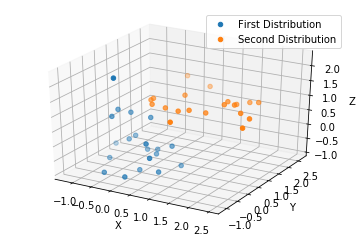

In [3]:
# plot on 3d graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p1[:,0],p1[:,1],p1[:,2],label='First Distribution')
ax.scatter(p2[:,0],p2[:,1],p2[:,2],label='Second Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

### 2. What do the points look like?

The distributions are centered around two different points: (0,0,0) and (1,1,1). The first distribution has a greater range of Z values than the second, which seems almost flat. Other than this, the distributions look vaguely similar in the X and Y directions. The first distribution looks like a ball in space and the second looks like a disk

### 3. Covariance of the new set

In [5]:
# concatenate samples and compute covariance  
samples = np.concatenate((p1,p2)) # 40x3 matrix
# print ('Samples Matrix')
# print (samples)
print ("Actual Covariance Matrix")
print (np.cov(samples.T))
mean = np.mean(samples, axis=0)
norm = samples - mean
print ("Calculated Covariance Matrix")
covXY = np.dot(norm.T,norm)/(40-1)
print (covXY)

Actual Covariance Matrix
[[ 0.88048326  0.21633137  0.30010702]
 [ 0.21633137  0.74552765  0.28208668]
 [ 0.30010702  0.28208668  0.66118964]]
Calculated Covariance Matrix
[[ 0.88048326  0.21633137  0.30010702]
 [ 0.21633137  0.74552765  0.28208668]
 [ 0.30010702  0.28208668  0.66118964]]


The formula for calculating covariance is:
$$\sum_{}^\wedge = \frac{1}{n}\times\sum_{i\in S}^nX^i\cdot \left(X^i\right)^T$$
where x is the point vector. 

This is equivalent to 
$$\sum_{}^\wedge{_{ab}} = \frac{1}{n} \sum_{i=1}^nX_a^i\cdot X^i_b = \frac{1}{n} \left(X_a^T\cdot X_b\right)$$
where 
$$ X_a = \begin{bmatrix}X_a^1 \\ X_a^2 \\ ... \\ X_a^n \end{bmatrix}$$

Therefore, given 
$$ X = \begin{bmatrix}X_1^1 & X_2^1 & ... & X_m^1 \\ X_1^2  & X_2^2 & ... & X_m^2\\ ... \\ X_1^n  & X_2^n & ... & X_m^n\end{bmatrix}$$
with *n* being the number of samples and *m* being the dimension of the distribution,
$$\sum_{}^\wedge = \frac{1}{n}\left( X^T\cdot X\right)$$ 

### 4. PCA with rank 2

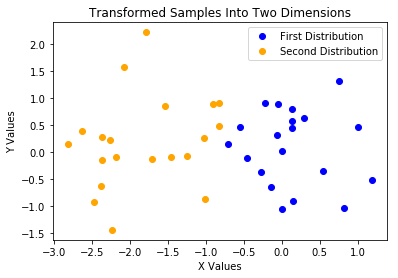

Yes, PCA made it easier to distinguish the two distributions in two dimensions and see their differences.


In [6]:
values,vectors = np.linalg.eig(covXY)
indices = np.argsort(values)[-2:]
vector1 = vectors[:,indices[1]] #eigenvector with the largest eigenvalue
vector2 = vectors[:,indices[0]] #eigenvector with the second largest eigenvalue'

newVectors = np.column_stack((vector1,vector2)) # 3x2 eigenvector matrix
transformed = np.dot(newVectors.T,samples.T) # 2x3 * 3x40 = 2x40 matrix

plt.plot(transformed[0,0:20],transformed[1,0:20],'o',color='blue',label='First Distribution');
plt.plot(transformed[0,20:],transformed[1,20:],'o',color='orange',label='Second Distribution');
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Transformed Samples Into Two Dimensions')
plt.legend()
plt.show()

print ('Yes, PCA made it easier to distinguish the two distributions in two dimensions and see their differences.')

## Problem 2: Low rank approximation of Mona Lisa

### 1. Low rank approximation

(603L, 400L)
Show rank k= 2,k= 5 and k= 10 approximation to Mona Lisa
('\nRank =', 2)


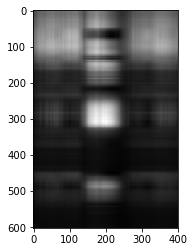

('\nRank =', 5)


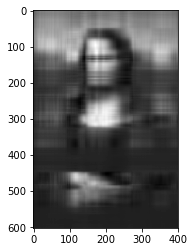

('\nRank =', 10)


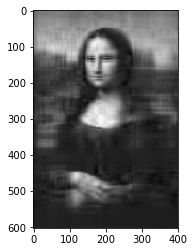

In [7]:
from PIL import Image
img = np.array(Image.open('inputs/mona_lisa.png').convert('L'))
print (img.shape)

print ('Show rank k= 2,k= 5 and k= 10 approximation to Mona Lisa')
u, s, v = np.linalg.svd(img,full_matrices=False)
for k in [2,5,10]:
    s2 = s.copy()
    s2[k:] = 0
    print ('\nRank =',k)
    lowRankImg = np.dot(np.dot(u, np.diag(s2)), v)
    plt.gray()
    plt.imshow(lowRankImg)
    plt.show()

### 2. Compressed Mona Lisa bits for each rank

To store the compressed image, we will only store the singular values we are interested in and their corresponding eigenvectors. Assuming we store each number as a python float (64 bits), our low rank approximations can be stored in fewer bits that the original. We can reduce this value if we use 32 bit floats.


Rank = x has ((x)(603) + x + (x)(400))(64) bits

Rank = 2 : 128512 bits

Rank = 5 : 321280 bits

Rank = 10 : 642560 bits

Original Image : 3859200 bits

## Problem 3: Using Low Rank Structure for Corrupted Entries

To determine whether a matrix is corrupted, we will use sklearn pca to determine how many singular values we will need to reconstruct the matrix with 99.999% accuracy (we chose 99.999% since increasing the accuracy threshold did not yeild affect the number of important singular values). The resulting matrix only differed from the original by less than 1*10^-11 per value

[-10000, 25000, -30000, 30000]

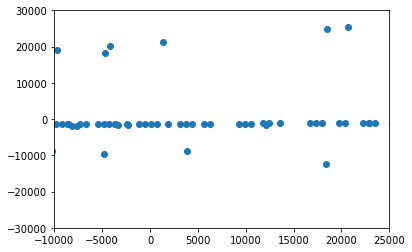

In [97]:
corrMat1 = np.genfromtxt('inputs/CorrMat1.csv', delimiter=',')
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed = pca.fit_transform(corrMat1)
plt.scatter(transformed[:,0],transformed[:,1])
plt.axis([-10000, 25000, -30000, 30000])

[-10000, 25000, -30000, 30000]

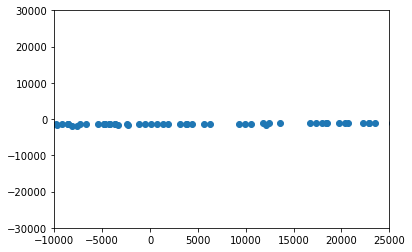

In [98]:
uncorrPoints = transformed[np.logical_and(transformed[:,1]>-5000,transformed[:,1]<5000)]
corrPoints = np.array([i for i in transformed if not i in uncorrPoints])
corrPoints[:,1] = np.poly1d(np.polyfit(uncorrPoints[:,0], uncorrPoints[:,1], 1))(corrPoints[:,0])
newPoints = np.append(uncorrPoints,corrPoints, axis=0)
plt.scatter(newPoints[:,0],newPoints[:,1])
plt.axis([-10000, 25000, -30000, 30000])

Corrupt Matrix:


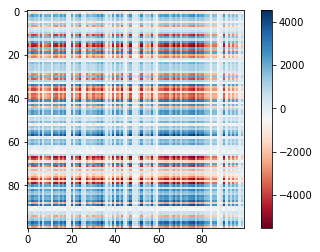

Fixed Matrix:


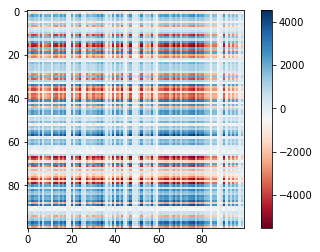

In [123]:
uncorrMat1 = np.dot(newPoints,pca.components_)
print "Corrupt Matrix:"
plt.imshow(uncorrMat1,cmap="RdBu")
plt.colorbar()
plt.show()
print "Fixed Matrix:"
plt.imshow(uncorrMat1,cmap="RdBu")
plt.colorbar()
plt.show()

In [140]:
corrMat3 = np.genfromtxt('inputs/CorrMat3.csv', delimiter=',')
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
transformedMat3 =  pca.fit_transform(corrMat3)
a = uncorrMat1
np.allclose(a, a.T, atol=1e4)

True